First submission using a logistic regression classifier.

Approach:
1 - view data
2 - choose columns which seem most viable
3 - visualise data

In [1]:
#read data
import pandas as pd
import numpy as np

df = pd.read_csv('../input/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Throw away useless data

In [2]:
# drop unused columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Embarked', 'Cabin', 'Fare'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [3]:
# visualize data for sex survived

sex_survived_df = df[['Sex', 'Survived']]
sex_survived_df = sex_survived_df.groupby(['Sex', 'Survived']).size()
sex_survived_df.head()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [4]:
# visualize data for survivors with siblings on board

sib_survived_df = df[['SibSp', 'Survived']]
sib_survived_df = sib_survived_df.groupby(['SibSp', 'Survived']).size()
sib_survived_df.head(n=20)

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
dtype: int64

In [5]:
# visualize data for survivors with parents on board

parch_survived_df = df[['Parch', 'Survived']]
parch_survived_df = parch_survived_df.groupby(['Parch', 'Survived']).size()
parch_survived_df.head(n=6)

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
dtype: int64

In [6]:
# visualize data for pclass survived

pclass_survived_df = df[['Pclass', 'Survived']]
pclass_survived_df = pclass_survived_df.groupby(['Pclass', 'Survived']).size()
pclass_survived_df.head(n=6)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

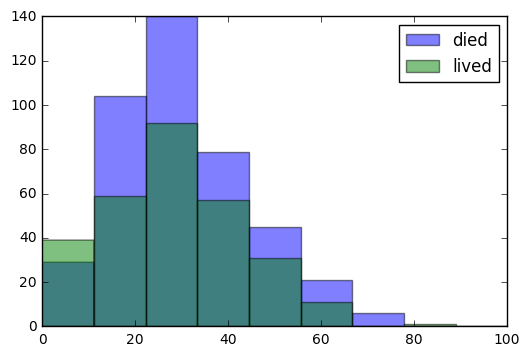

In [7]:
from matplotlib import pyplot

# visualize data for pclass survived

pclass_survived_df = df[['Age', 'Survived']]
pclass_lived_df = df.loc[df['Survived'] == 1]
pclass_died_df = df.loc[df['Survived'] == 0]


lived = pclass_lived_df['Age'].astype(np.float).dropna()
died = pclass_died_df['Age'].astype(np.float).dropna()
bins = np.linspace(0, 100, 10)

pyplot.hist(died, bins, alpha=0.5, label='died')
pyplot.hist(lived, bins, alpha=0.5, label='lived')
pyplot.legend(loc='upper right')
pyplot.show()

From the above, we can draw the conclusion that the best columns to use from the dataset are

 1. Sex
 2. Pclass
 3. Age (Optional)

In [8]:
from sklearn import cross_validation, preprocessing

# prep data
df2 = df[['Age', 'Pclass', 'Sex', 'Survived']]
df2['Sex'] = (df['Sex'] !='male')
df2 = df2.astype(float).fillna(0)


X = df2.ix[:,['Age', 'Pclass', 'Sex']].as_matrix()
X = preprocessing.scale(X)
y = df2.Survived.astype(int).as_matrix()
labels = np.unique(y)

[X_train, X_cv, y_train, y_cv] = cross_validation.train_test_split(X, y, test_size = 0.2)

/Users/user/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
# create logisitic regression model
from sklearn import linear_model

clf = linear_model.LogisticRegression().fit(X_train, y_train);

print("logistic regression model trained")

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

y_cv_pred = clf.predict(X_cv)

acc = accuracy_score(y_cv_pred, y_cv)
print('accuracy: ' + str(acc))

f1 = f1_score(y_cv_pred, y_cv)
print('f1: ' + str(f1))

recall = recall_score(y_cv_pred, y_cv)
print('recall: ' + str(recall))

precision = precision_score(y_cv_pred, y_cv)
print('precision: ' + str(precision))

logistic regression model trained
accuracy: 0.782122905028
f1: 0.741721854305
recall: 0.777777777778
precision: 0.708860759494


In [10]:
# prep data
data_test = pd.read_csv('../input/test.csv')

df_test = data_test[['Age', 'Pclass', 'Sex']]
df_test['Sex'] = (data_test['Sex'] !='male')
df_test = df_test.astype(float).fillna(0)

X_test = df_test.ix[:,['Age', 'Pclass', 'Sex']].as_matrix()
X_test = preprocessing.scale(X_test)

y_pred = clf.predict(X_test)

/Users/user/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
submission = pd.DataFrame({
        "PassengerId": data_test["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('../output/titanic.csv', index=False)